In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [2]:
from scoringrules import crps_normal

# Make painel for the output targets:

In [3]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def get_preds(state, year, model_name, clima = False):

    if clima: 
        df_preds = pd.read_csv(f'./predictions/preds_climate_{state}_{year}_{model_name}.csv')

    else: 
        df_preds = pd.read_csv(f'./predictions/preds_{state}_{year}_{model_name}.csv')
        
    df_preds.dates = pd.to_datetime(df_preds.dates)

    # REPLACE O BY 1 TO ALLOW THE CALCULUS OF THE INDEX
    df_preds['preds'] = df_preds['preds'].replace({0:1})

    df_preds['upper'] = df_preds['upper'].replace({0:1})

    return df_preds


def get_score(df_true, df_preds):
    
    score = crps_normal(df_true.casos, df_preds.preds, (df_preds.upper-df_preds.lower)/4)
    
    return np.mean(score)


def plot_preds(ax, i, state, model_name1, model_name2, model_name3, clima): 

    data_w = data.loc[data.uf == state]

    data_w.loc[:, 'date'] = pd.to_datetime(data_w.date)
    
    data_w.set_index('date',inplace = True)
    
    data_w = data_w[['casos']].resample('W-SUN').sum()

    df_preds_23_1 = get_preds(state, 2023, model_name1, clima)

    df_preds_23_2 = get_preds(state, 2023, model_name2, clima)

    df_preds_23_3 = get_preds(state, 2023, model_name3, clima)

    df_preds_24_1 = get_preds(state, 2024, model_name1, clima)

    df_preds_24_2 = get_preds(state, 2024, model_name2, clima)

    df_preds_24_3 = get_preds(state, 2024, model_name3, clima)

    data_w_23 = data_w.loc[data_w.index.isin(df_preds_23_1.dates)]

    ax[i].plot(data_w_23.casos, label = 'Data', color = 'black')

    ax[i].plot(df_preds_23_1.dates, df_preds_23_1.preds, label = f'preds - {model_name1}', color = 'tab:orange')

    ax[i].fill_between( df_preds_23_1.dates, df_preds_23_1.lower, df_preds_23_1.upper, color = 'tab:orange', alpha = 0.2)

    ax[i].plot(df_preds_23_2.dates, df_preds_23_2.preds, label = f'preds- {model_name2}', color = 'tab:red')

    ax[i].fill_between( df_preds_23_2.dates, df_preds_23_2.lower, df_preds_23_2.upper, color = 'tab:red', alpha = 0.2)

    ax[i].plot(df_preds_23_3.dates, df_preds_23_3.preds, label = f'preds- {model_name3}', color = 'tab:green')

    ax[i].fill_between( df_preds_23_3.dates, df_preds_23_3.lower, df_preds_23_3.upper, color = 'tab:green', alpha = 0.2)
    
    m_score = f'''CRPS \n{model_name1}: {round(get_score(data_w_23, df_preds_23_1), 2)}\n{model_name2} - : { round(get_score(data_w_23,df_preds_23_2),2)}\n{model_name3} - : { round(get_score(data_w_23,df_preds_23_3),2)}'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    at.patch.set_alpha(0.25) 

    ax[i].add_artist(at)

    ax[i].set_title(f'{state} - 2023')

    data_w_24 = data_w.loc[data_w.index.isin(df_preds_24_1.dates)]

    ax[i+1].plot(data_w_24.casos, label = 'Data', color = 'black')

    ax[i+1].plot(df_preds_24_1.dates, df_preds_24_1.preds, label = f'{model_name1}', color = 'tab:orange')

    ax[i+1].fill_between( df_preds_24_1.dates, df_preds_24_1.lower, df_preds_24_1.upper, color = 'tab:orange', alpha = 0.2)

    ax[i+1].plot(df_preds_24_2.dates, df_preds_24_2.preds, label = f'{model_name2}', color = 'tab:red')

    ax[i+1].fill_between( df_preds_24_2.dates, df_preds_24_2.lower, df_preds_24_2.upper, color = 'tab:red', alpha = 0.2)

    ax[i+1].plot(df_preds_24_3.dates, df_preds_24_3.preds, label = f'{model_name3}', color = 'tab:green')

    ax[i+1].fill_between( df_preds_24_3.dates, df_preds_24_3.lower, df_preds_24_3.upper, color = 'tab:green', alpha = 0.2)
    
    ax[i+1].set_title(f'{state} - 2024')

    ax[i+1].legend(bbox_to_anchor=(1.25, 0.525, 0.1, 0.5))

    m_score = f'''CRPS \n{model_name1}: {round(get_score(data_w_24, df_preds_24_1.iloc[:35]), 2)}\n{model_name2}: { round(get_score(data_w_24,df_preds_24_2.iloc[:35]),2)}\n{model_name3}: { round(get_score(data_w_24,df_preds_24_3.iloc[:35]),2)}'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )

    at.patch.set_alpha(0.25) 
    
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    ax[i+1].add_artist(at)
    

### Loading the dataset of cases:

In [5]:
data = pd.read_csv('./data/dengue.csv.gz')

### Comparando o modelo com e sem clima: 

In [6]:
model_name = 'baseline'

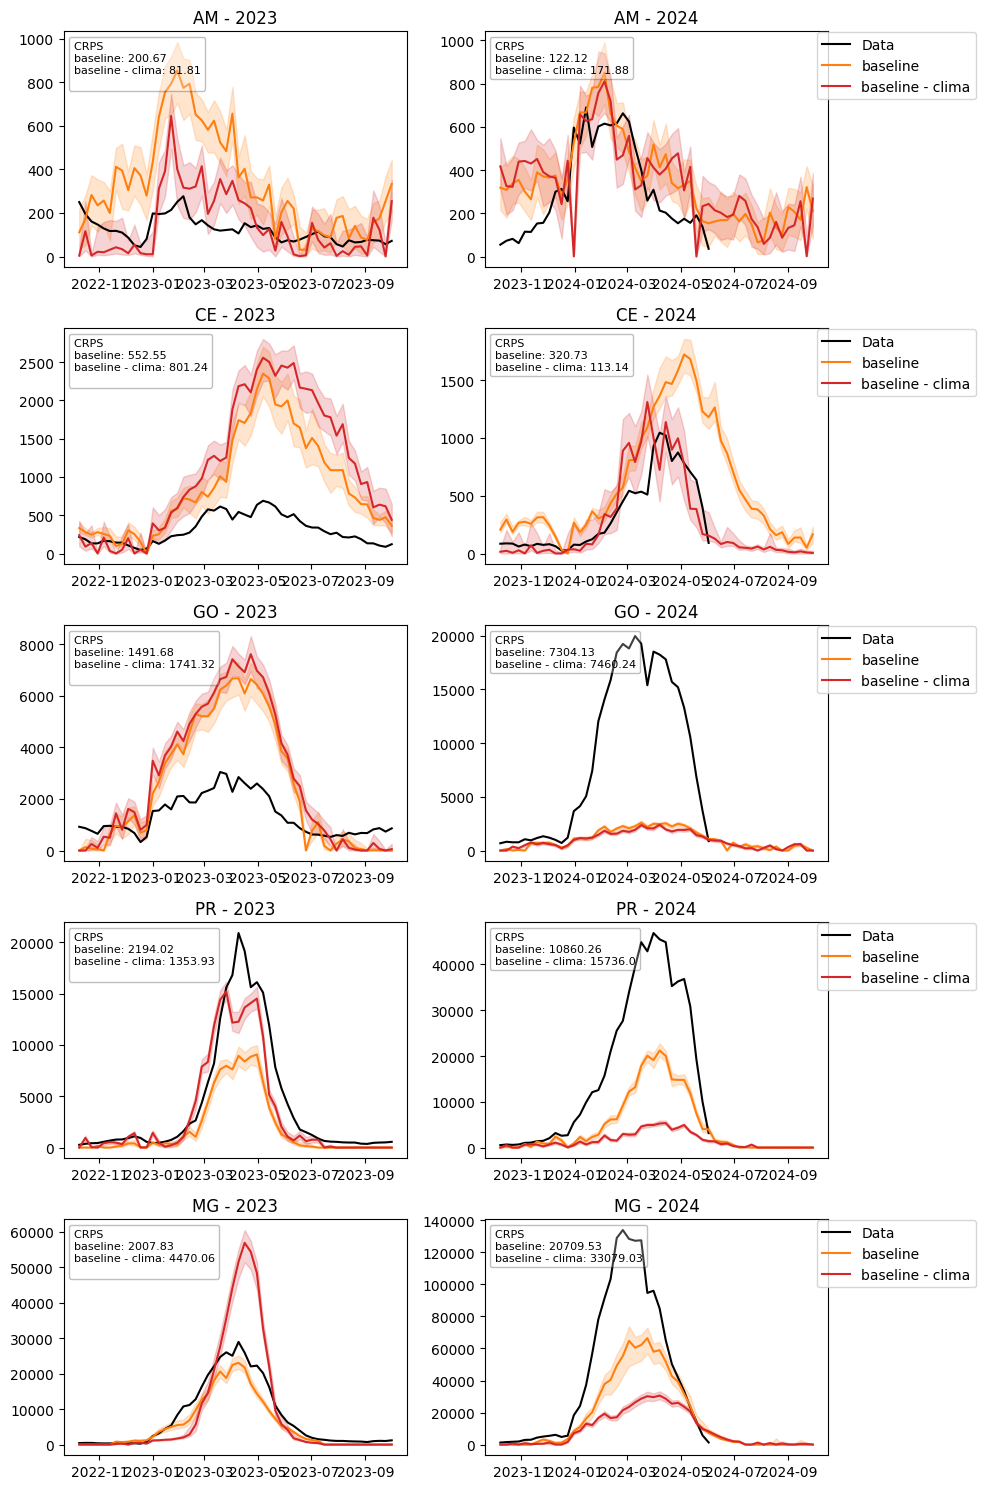

In [7]:
fig, axs = plt.subplots(5,2, figsize = (10, 15))

ax = axs.ravel()

i=0
for state in ['AM', 'CE', 'GO', 'PR', 'MG']:

    data_w = data.loc[data.uf == state]

    data_w.loc[:, 'date'] = pd.to_datetime(data_w.date)
    
    data_w.set_index('date',inplace = True)
    
    data_w = data_w[['casos']].resample('W-SUN').sum()

    df_preds_23_1 = get_preds(state, 2023, model_name, clima = False)

    df_preds_23_2 = get_preds(state, 2023, model_name, clima = True)

    df_preds_24_1 = get_preds(state, 2024, model_name, clima = False)

    df_preds_24_2 = get_preds(state, 2024, model_name, clima = True)

    data_w_23 = data_w.loc[data_w.index.isin(df_preds_23_1.dates)]

    ax[i].plot(data_w_23.casos, label = 'Data', color = 'black')

    ax[i].plot(df_preds_23_1.dates, df_preds_23_1.preds, label = f'{model_name}', color = 'tab:orange')

    ax[i].fill_between( df_preds_23_1.dates, df_preds_23_1.lower, df_preds_23_1.upper, color = 'tab:orange', alpha = 0.2)

    ax[i].plot(df_preds_23_2.dates, df_preds_23_2.preds, label = f'{model_name} - clima', color = 'tab:red')

    ax[i].fill_between( df_preds_23_2.dates, df_preds_23_2.lower, df_preds_23_2.upper, color = 'tab:red', alpha = 0.2)

    
    m_score = f'''CRPS \n{model_name}: {round(get_score(data_w_23, df_preds_23_1), 2)}\n{model_name} - clima: { round(get_score(data_w_23,df_preds_23_2),2)}\n'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    at.patch.set_alpha(0.25) 

    ax[i].add_artist(at)

    ax[i].set_title(f'{state} - 2023')

    data_w_24 = data_w.loc[data_w.index.isin(df_preds_24_1.dates)]

    ax[i+1].plot(data_w_24.casos, label = 'Data', color = 'black')

    ax[i+1].plot(df_preds_24_1.dates, df_preds_24_1.preds, label = f'{model_name}', color = 'tab:orange')

    ax[i+1].fill_between( df_preds_24_1.dates, df_preds_24_1.lower, df_preds_24_1.upper, color = 'tab:orange', alpha = 0.2)

    ax[i+1].plot(df_preds_24_2.dates, df_preds_24_2.preds, label = f'{model_name} - clima', color = 'tab:red')

    ax[i+1].fill_between( df_preds_24_2.dates, df_preds_24_2.lower, df_preds_24_2.upper, color = 'tab:red', alpha = 0.2)
    
    ax[i+1].set_title(f'{state} - 2024')

    ax[i+1].legend(bbox_to_anchor=(1.35, 0.525, 0.1, 0.5))

    m_score = f'''CRPS \n{model_name}: {round(get_score(data_w_24, df_preds_24_1.iloc[:35]), 2)}\n{model_name} - clima: { round(get_score(data_w_24,df_preds_24_2.iloc[:35]),2)}'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )

    at.patch.set_alpha(0.25) 
    
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    ax[i+1].add_artist(at)

    i = i + 2
    
plt.tight_layout()

plt.show()

### Comparando os modelos que não utilizam a série de clima

In [10]:
model_name1 = 'baseline'
model_name2 = 'att'
model_name3= 'comb'

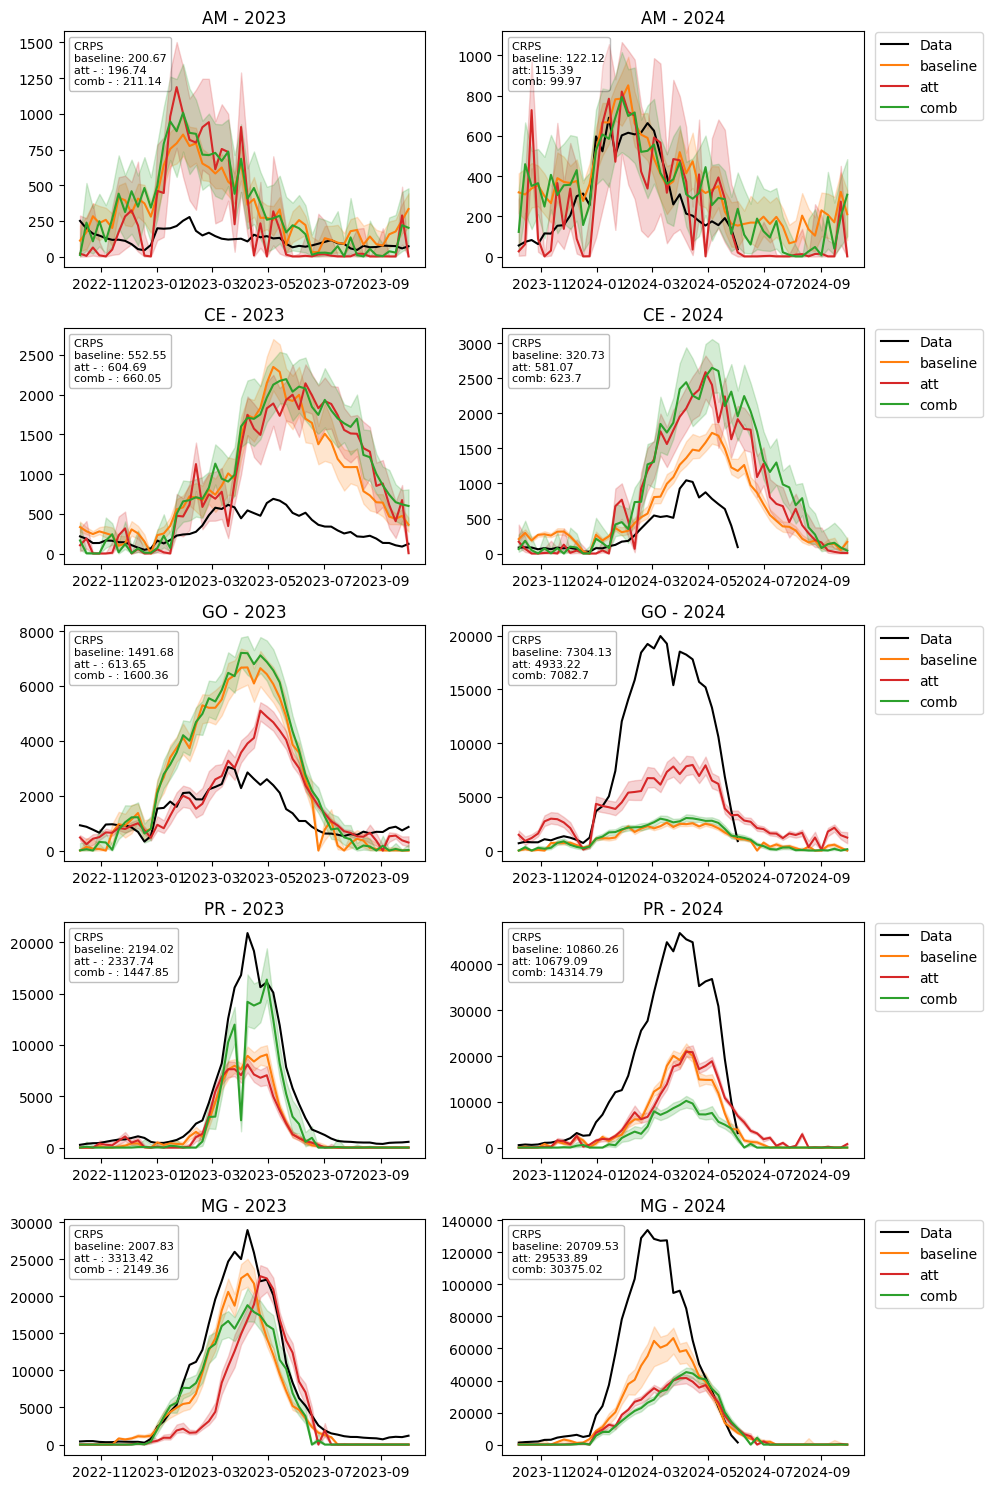

In [11]:
fig, axs = plt.subplots(5,2, figsize = (10, 15))

ax = axs.ravel()

i=0
for state in ['AM', 'CE', 'GO', 'PR', 'MG']:

    plot_preds(ax, i, state, model_name1, model_name2, model_name3, clima = False)

    i = i+2
    
plt.tight_layout()

plt.show()

### Comparando os modelos usando a série de clima: 

In [10]:
model_name1 = 'baseline'
model_name2 = 'att'
model_name3= 'comb'

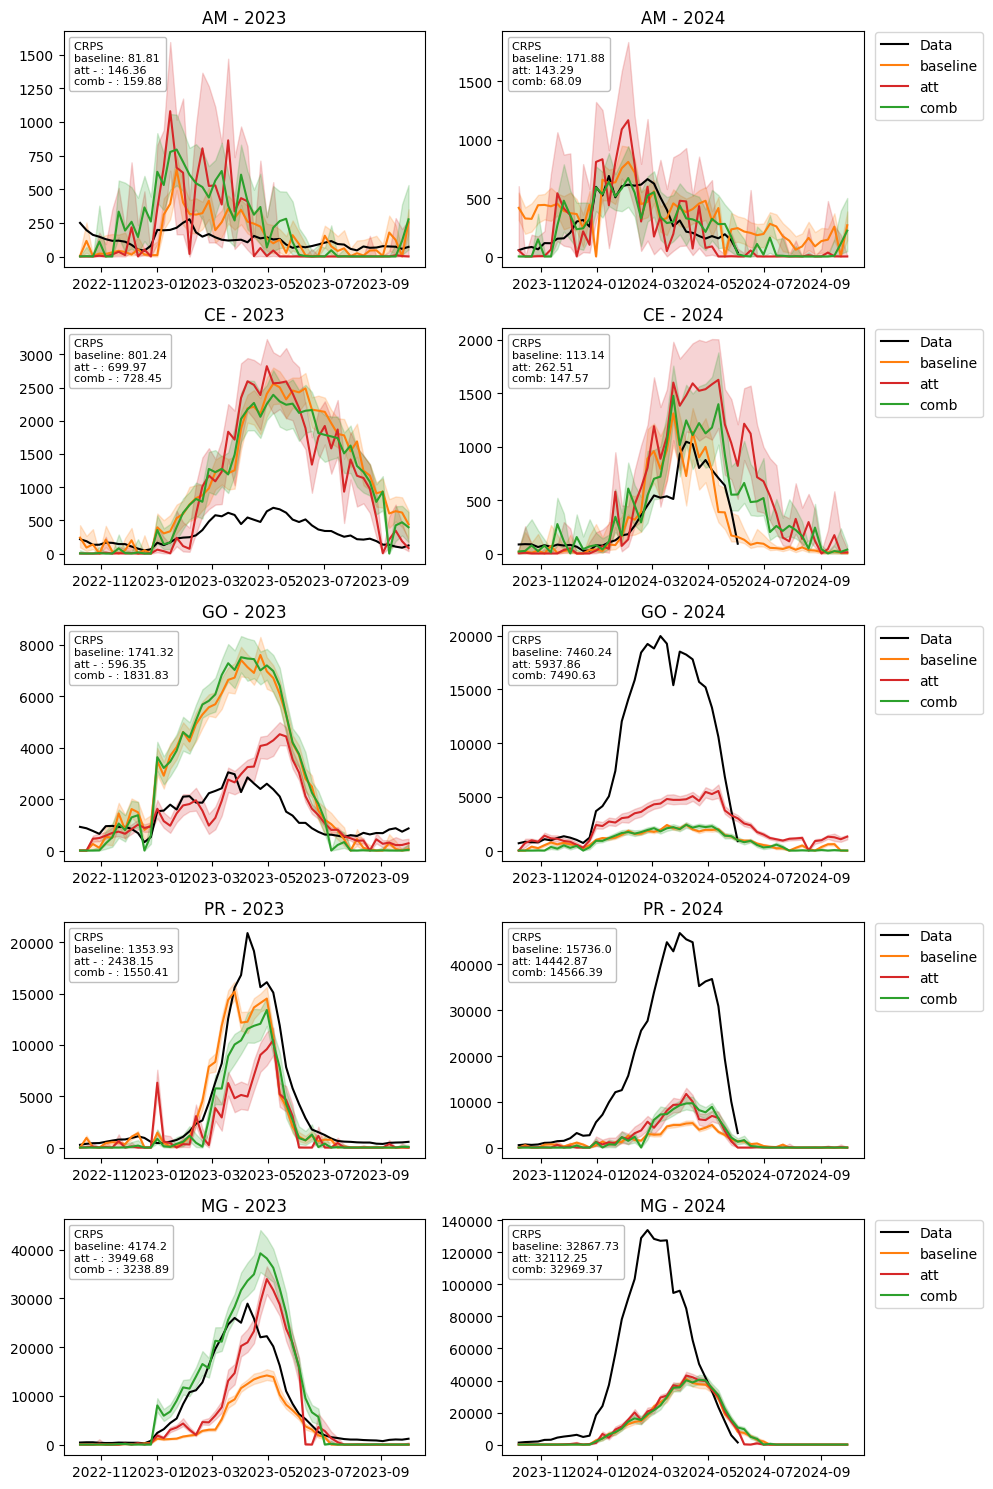

In [11]:
fig, axs = plt.subplots(5,2, figsize = (10, 15))

ax = axs.ravel()

i=0
for state in ['AM', 'CE', 'GO', 'PR', 'MG']:

    plot_preds(ax, i, state, model_name1, model_name2, model_name3, clima = True)

    i = i+2
    
plt.tight_layout()

plt.show()

plt.show()